# Data Exploration
Here we shall explore the data to see any strong relationships and determine what would be good features.

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from pathlib import Path
%matplotlib inline


DATA_DIR = Path("./data")
train_dir = DATA_DIR / "train.csv"

In [2]:
df = pd.read_csv(train_dir)

## Variables

**Target Variable**:

|Variable|Definition|Key|
|:---:|:---:|:---:|
|survival|Survival|0 = No, 1 = Yes|

**Predictors**:

|Variable|Definition|Key|
|:---:|:---:|:---:|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||
|Age|Age in years||
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||
|fare|How much they paid for their ticket.||
|cabin|Cabin number||
|embarked|Where they started their journey from.|C = Cherbourg, Q = Queenstown, S = Southampton|

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Correlation between variables

<ipython-input-115-efb4aaffcd5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_["Sex"] = df_["Sex"].replace(["male", "female"], [0, 1])


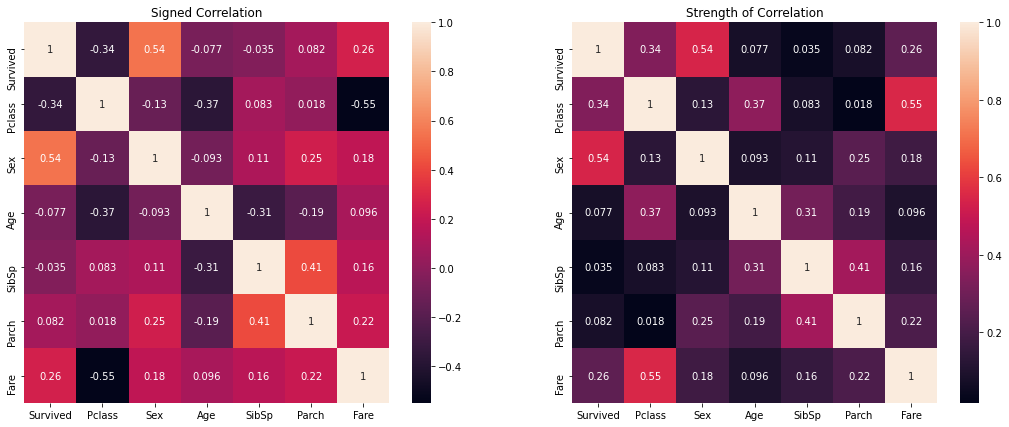

In [115]:
df_ = df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]]
df_["Sex"] = df_["Sex"].replace(["male", "female"], [0, 1])
# TODO: Find out why this warning is happening

fig, ax = plt.subplots(1, 2, figsize=(18, 7))
ax[0].set_title("Signed Correlation"); ax[1].set_title("Strength of Correlation") 
sns.heatmap(df_.corr(), annot=True, ax=ax[0])
sns.heatmap(abs(df_.corr()), annot=True, ax=ax[1]);

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Prior expected effect of predictors

| Variable | Expected effect | Explanation |
|:-:|:-:|:-:|
| pclass | 1 most likely to survive and 3 least | Richer people may have been prioritised |
| sex | Females +ve | Females get prioritised |
| age | Younger +ve | Younger people get prioritised |
| sibsp | - | Unsure |
| parch | - | Unsure |
| ticket | - | Coincides with fare |
| fare | Higher +ve | Coincides with pclass |
| cabin | - | Mostly missing data. 204/891 available entries |
| Embarked | - | Even distribution of class among areas? |



#### Class
Over half the passengers comprise of those in third class however it seems that third class passengers do not even account for half of the surviving passengers.


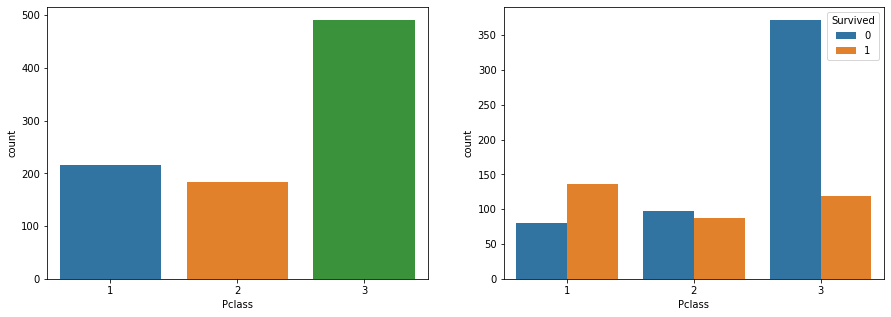

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x="Pclass", data=df, ax=ax[0])
sns.countplot(x="Pclass", hue="Survived", data=df, ax=ax[1]);

Indeed, we can verify that those in a higher class are much more likely to survive.

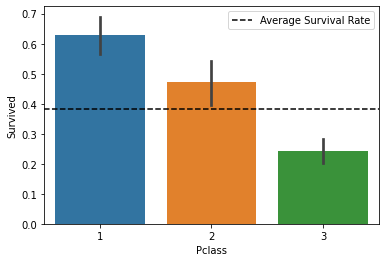

In [37]:
average_survival_rate = df.Survived.mean()
sns.barplot(x="Pclass", y="Survived", data=df)
plt.axhline(average_survival_rate, color="k", linestyle="--", label="Average Survival Rate")
plt.legend();

#### Sex
By considering the proportion of survivors in each group we see that females are much more likely to survive. Even when we stratify by third class females are more likely to survive than first class males.

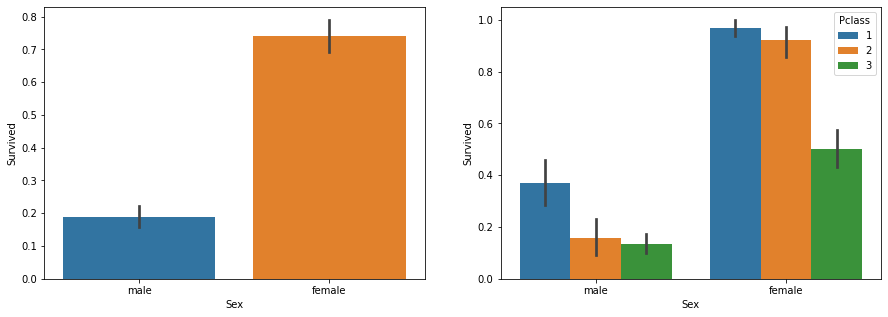

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x="Sex", y="Survived", data=df, ax=ax[0])
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df, ax=ax[1]);

### Identifying demographics

And for interest do a clustering to determine the demographics.

### Feature Selection

### Fit the model
Classification Problem apply:
* KNN, SVM, Logistic Regression, Decision Trees, XGBoost

### Prediction